In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import math
import sys
%matplotlib inline

sns.set()

# training : 730days ,  test : 60days

結果の結合

In [2]:

for i in range(1,6):
    result_pass = '../result/2test' + str(i) + '/result_mean.csv' 
    result = pd.read_csv(result_pass)
    print(len(result))
    if i == 1:
        total_result = result.iloc[:,1]
    else:
        total_result = pd.concat([total_result, result.iloc[:,1]], axis=0)
        

60
60
60
60
29


テストデータ期間の日付を結合

In [3]:
for i in range(1,6):
    test_pass = '../test/2test' + str(i) + '.csv'
    test_date = pd.read_csv(test_pass)
    print(len(test_date))
    if i == 1:
        total_test_date = test_date['date']
    else:
        total_test_date = pd.concat([total_test_date, test_date['date']], axis=0)

60
60
60
60
29


日付と結果の結合

In [4]:
test_index = []
for i in total_test_date:
        test_index.append(pd.to_datetime(i)) 
test_result = pd.DataFrame(list(zip(test_index,total_result)), columns = ['date','CustNum'])
# dateをインデックスに割り当て
test_result = test_result.set_index('date')


In [5]:
all_data = pd.read_csv('../data.csv')

all_data = all_data.loc[:,['date','CustNum']]

In [6]:
# date列をタイムスタンプ型に
def timestamp_data(df):
    index_lst = [] 
    for i in df['date']:
        index_lst.append(pd.to_datetime(i)) 
    split_df = pd.DataFrame(list(zip(index_lst,df.iloc[:,1])), columns = ['date','CustNum'])
    return split_df

all_data = timestamp_data(all_data)
all_data = all_data.set_index('date')


(array([17410., 17532., 17652., 17775., 17897., 18017., 18140., 18262.,
        18383.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

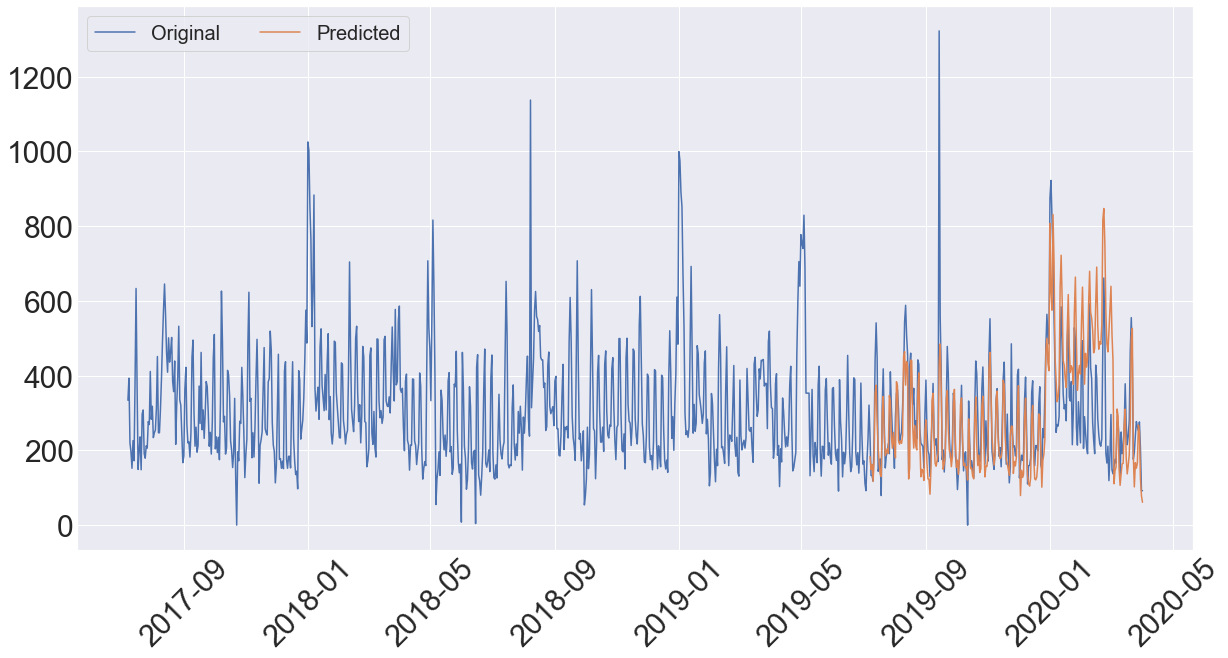

In [7]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(all_data, label='Original')
plt.plot(test_result,label='Predicted')

# sxmin='2020-02-15'
# sxmax='2020-10-12'

# xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

誤差

In [8]:
test_result["error"] = test_result["CustNum"] - all_data["CustNum"][-len(test_result):]

(array([18078., 18109., 18140., 18170., 18201., 18231., 18262., 18293.,
        18322., 18353.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

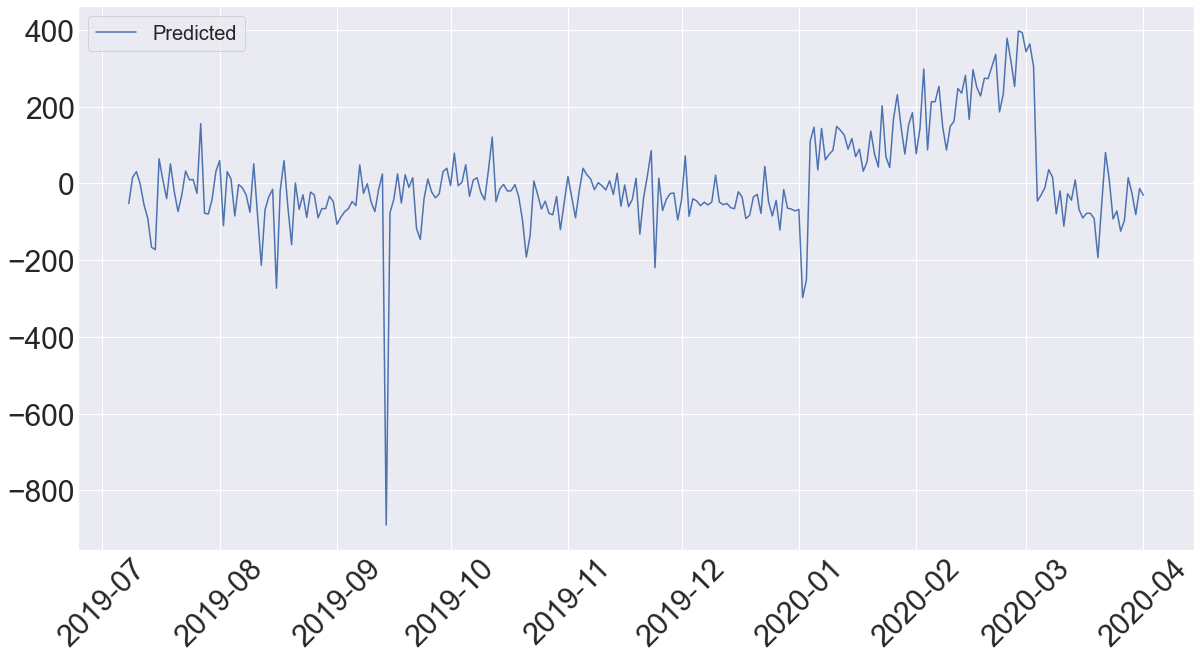

In [9]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
#plt.plot(all_data, label='Original')
plt.plot(test_result["error"],label='Predicted')

# sxmin='2020-02-15'
# sxmax='2020-10-12'

# xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

# training : 365days, test : 30days

### 売上・観光客数・食べログ・イベントインパクト

結果の結合

In [42]:
for i in range(1,23):
    # result_pass2 = '../result/skti/test' + str(i) + '/result_mean.csv' 
    result_pass2 = '../result/trend/test' + str(i) + '/result_mean.csv' 

    result2 = pd.read_csv(result_pass2)
    # print(len(result))
    if i == 1:
        total_result2 = result2.iloc[:,1]
    else:
        total_result2 = pd.concat([total_result2, result2.iloc[:,1]], axis=0)
        

テストデータ期間の日付を結合

In [43]:
for i in range(1,23):
    test_pass2 = '../test/test' + str(i) + '.csv'
    test_date2 = pd.read_csv(test_pass2)
    if i == 1:
        total_test_date2 = test_date2['date']
    else:
        total_test_date2 = pd.concat([total_test_date2, test_date2['date']], axis=0)

日付と結果の結合

In [44]:
test_index2 = []
for i in total_test_date2:
        test_index2.append(pd.to_datetime(i)) 
test_result2 = pd.DataFrame(list(zip(test_index2,total_result2)), columns = ['date','CustNum'])
# dateをインデックスに割り当て
test_result2 = test_result2.set_index('date')


In [45]:
all_data = pd.read_csv('../data.csv')

all_data = all_data.loc[:,['date','CustNum']]

In [46]:
# date列をタイムスタンプ型に
def timestamp_data(df):
    index_lst = [] 
    for i in df['date']:
        index_lst.append(pd.to_datetime(i)) 
    split_df = pd.DataFrame(list(zip(index_lst,df.iloc[:,1])), columns = ['date','CustNum'])
    return split_df

all_data = timestamp_data(all_data)
all_data = all_data.set_index('date')


(array([17410., 17532., 17652., 17775., 17897., 18017., 18140., 18262.,
        18383.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

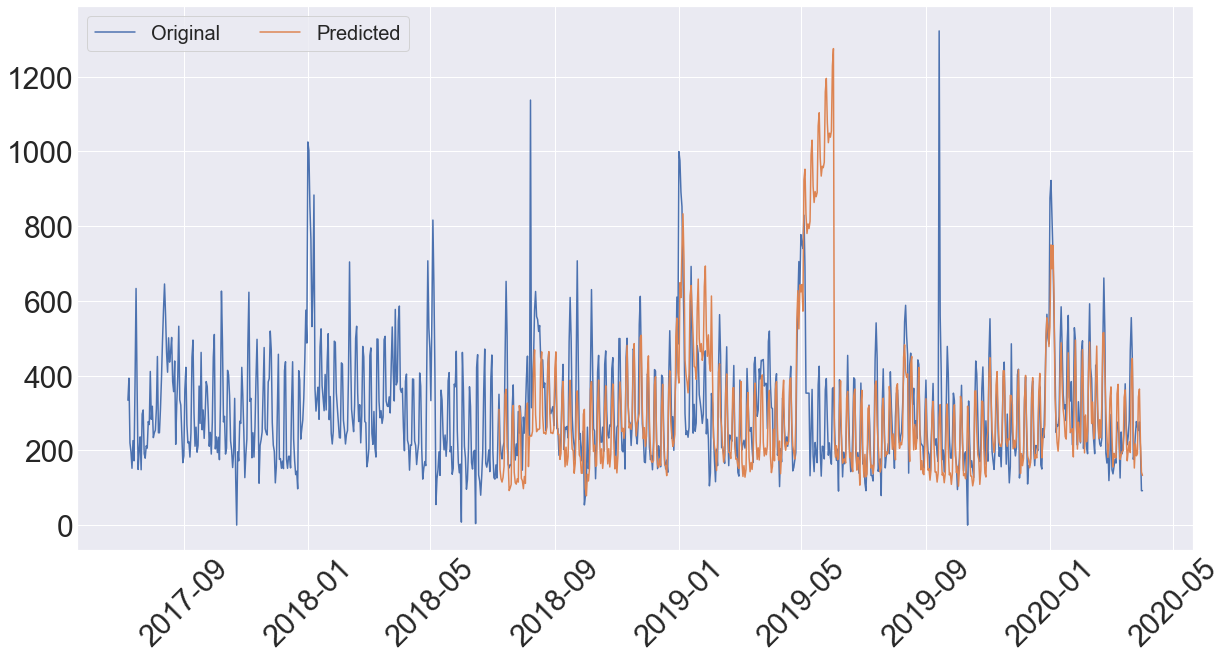

In [47]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(all_data, label='Original')
plt.plot(test_result2["CustNum"],label='Predicted')

# sxmin='2018-06-01'
# sxmax='2020-03-12'

# xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

(array([17866., 17873., 17880., 17887., 17897., 17904., 17911., 17918.,
        17928.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

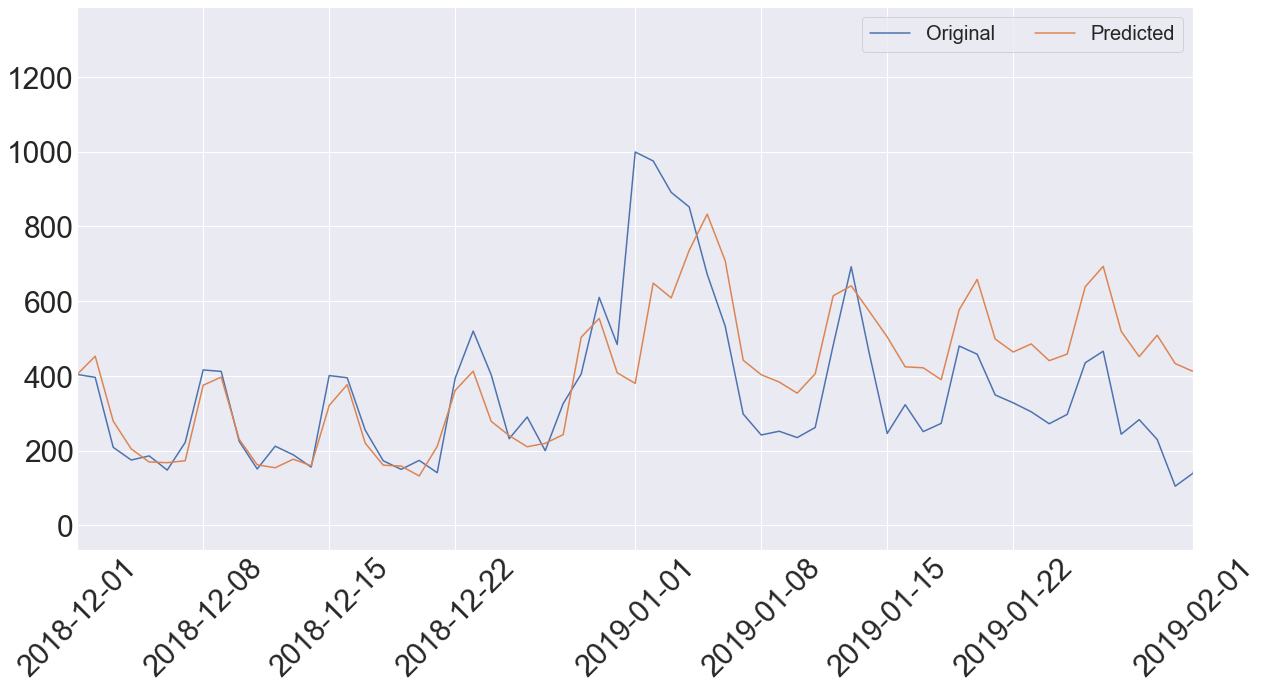

In [49]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(all_data[-len(test_result2):], label='Original')
plt.plot(test_result2["CustNum"],label='Predicted')

# sxmin='2019-04-01'
# sxmax='2019-07-01'
sxmin='2018-12-01'
sxmax='2019-02-01'
# sxmin='2019-06-01'
# sxmax='2019-10-01'

xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

誤差

In [41]:
test_result2["error"] = test_result2["CustNum"] - all_data["CustNum"][-len(test_result2):]

(array([17987., 18001., 18017., 18031., 18048., 18062., 18078.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

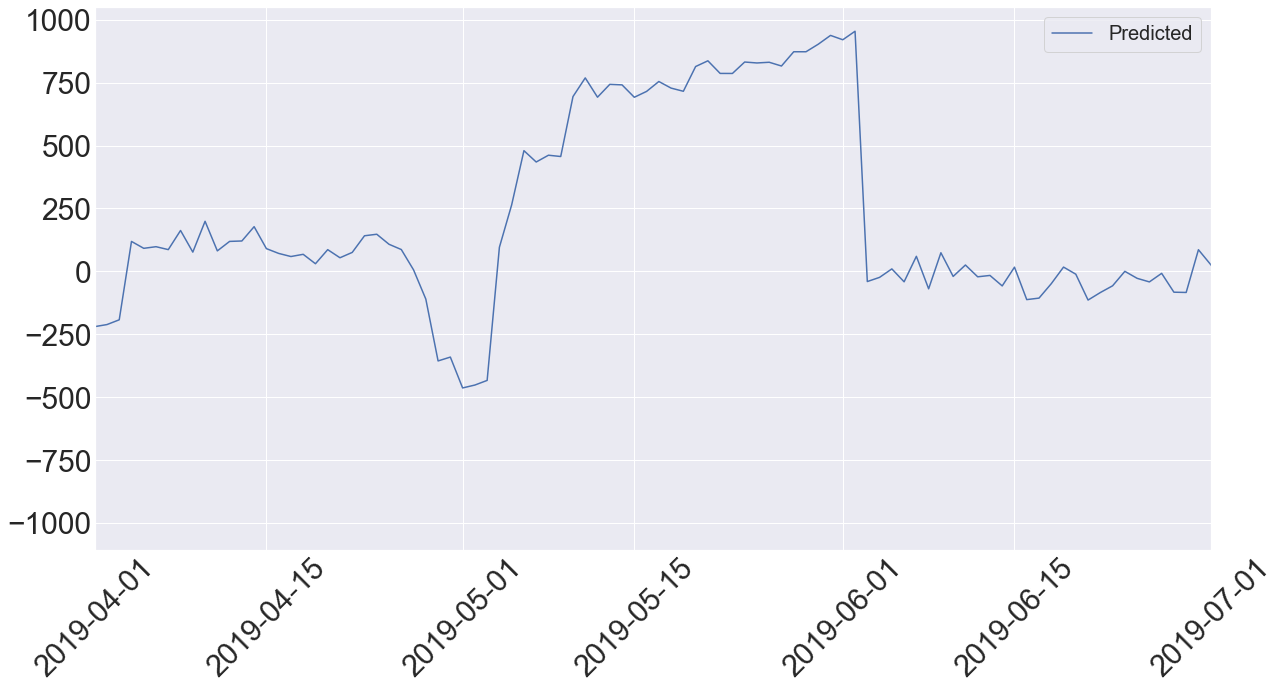

In [45]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
#plt.plot(all_data, label='Original')
plt.plot(test_result2["error"],label='Predicted')

sxmin='2019-04-01'
sxmax='2019-07-01'

xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

### イベントインパクト以外

結果の結合

In [46]:
for i in range(1,23):
    skt_result_pass = '../result/skt/test' + str(i) + '/result_mean.csv' 
    skt_result = pd.read_csv(skt_result_pass)
    # print(len(result))
    if i == 1:
        skt_total_result = skt_result.iloc[:,1]
    else:
        skt_total_result = pd.concat([skt_total_result, skt_result.iloc[:,1]], axis=0)
        

テストデータ期間の日付を結合

In [47]:
for i in range(1,23):
    skt_test_pass = '../test/test' + str(i) + '.csv'
    skt_test_date = pd.read_csv(skt_test_pass)
    if i == 1:
        skt_total_test_date = skt_test_date['date']
    else:
        skt_total_test_date = pd.concat([skt_total_test_date, skt_test_date['date']], axis=0)

日付と結果の結合

In [48]:
skt_test_index = []
for i in skt_total_test_date:
        skt_test_index.append(pd.to_datetime(i)) 
skt_test_result = pd.DataFrame(list(zip(skt_test_index,skt_total_result)), columns = ['date','CustNum'])
# dateをインデックスに割り当て
skt_test_result = skt_test_result.set_index('date')


In [49]:
all_data = pd.read_csv('../data.csv')

all_data = all_data.loc[:,['date','CustNum']]

In [50]:
# date列をタイムスタンプ型に
def timestamp_data(df):
    index_lst = [] 
    for i in df['date']:
        index_lst.append(pd.to_datetime(i)) 
    split_df = pd.DataFrame(list(zip(index_lst,df.iloc[:,1])), columns = ['date','CustNum'])
    return split_df

all_data = timestamp_data(all_data)
all_data = all_data.set_index('date')


(array([17410., 17532., 17652., 17775., 17897., 18017., 18140., 18262.,
        18383.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

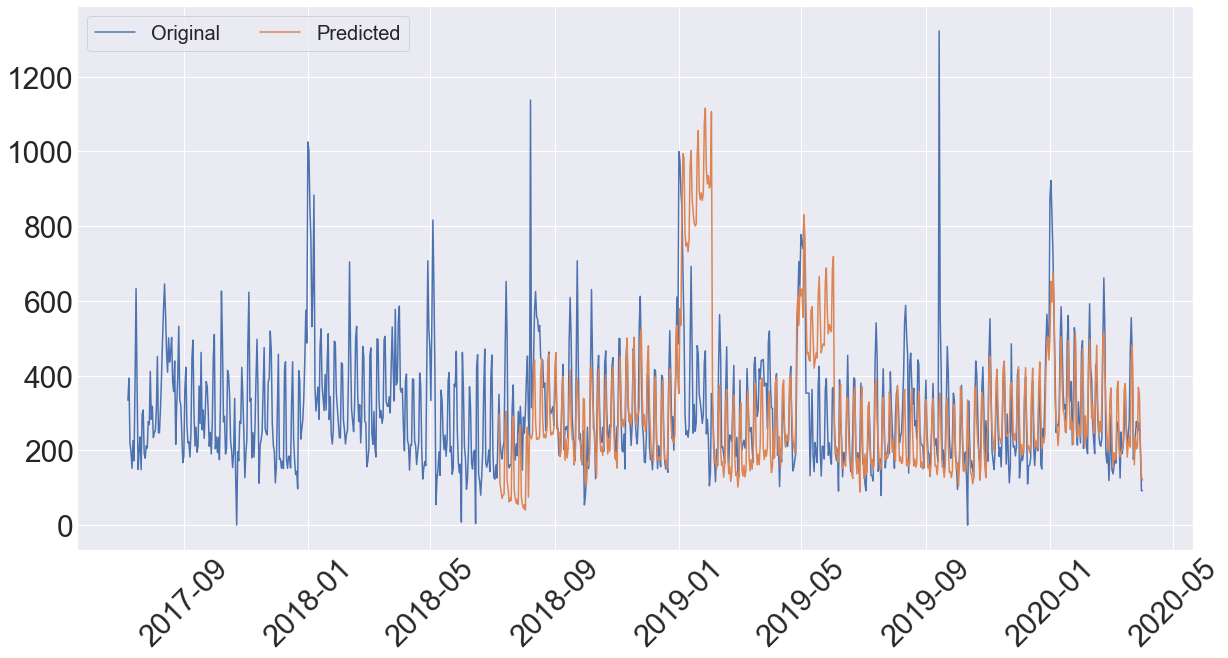

In [51]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(all_data, label='Original')
plt.plot(skt_test_result["CustNum"],label='Predicted')

# sxmin='2018-06-01'
# sxmax='2020-03-12'

# xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

(array([17987., 18001., 18017., 18031., 18048., 18062., 18078.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

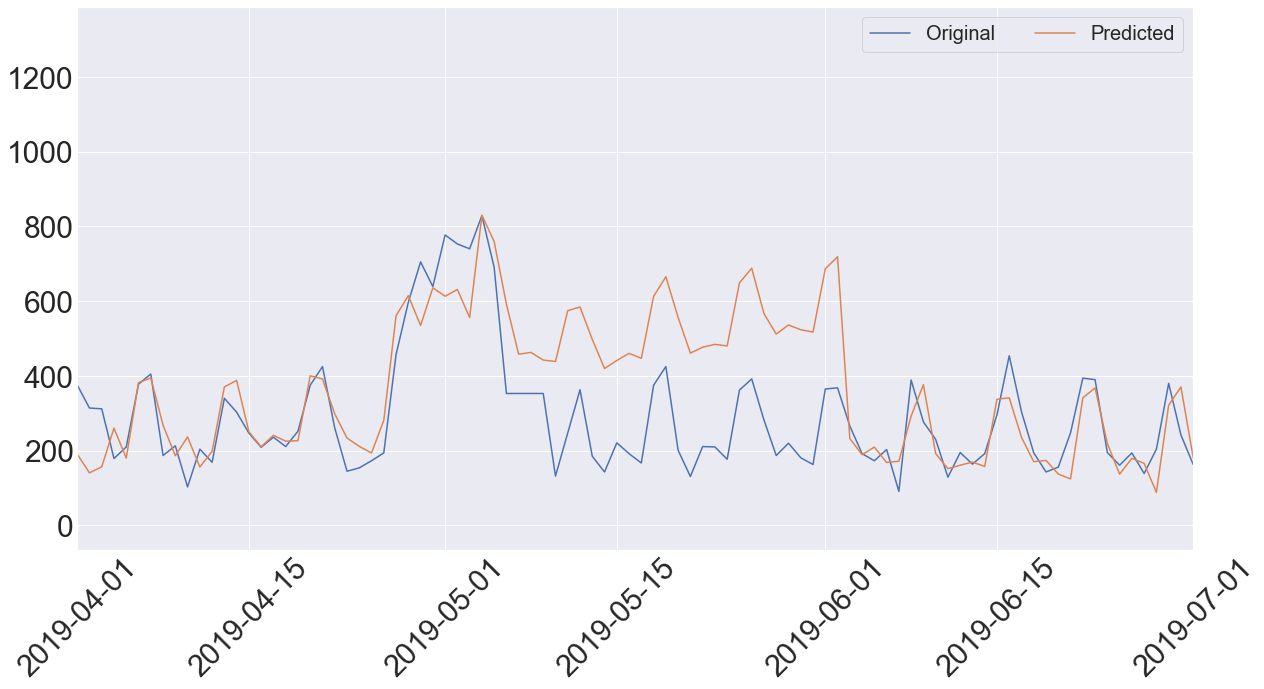

In [52]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(all_data[-len(skt_test_result):], label='Original')
plt.plot(skt_test_result["CustNum"],label='Predicted')

sxmin='2019-04-01'
sxmax='2019-07-01'

xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

誤差

In [53]:
skt_test_result["error"] = skt_test_result["CustNum"] - all_data["CustNum"][-len(skt_test_result):]

(array([17987., 18001., 18017., 18031., 18048., 18062., 18078.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

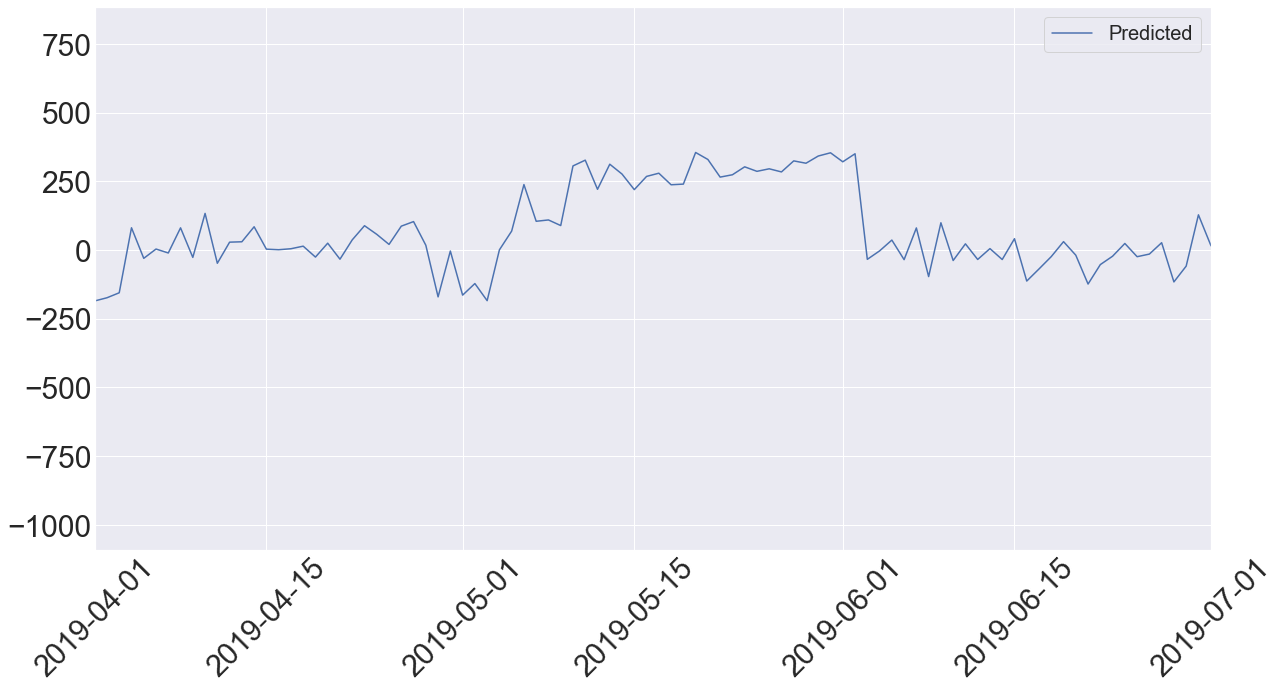

In [54]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
#plt.plot(all_data, label='Original')
plt.plot(skt_test_result["error"],label='Predicted')

sxmin='2019-04-01'
sxmax='2019-07-01'

xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

# 信頼区間

## training : 730days ,  test : 60days

In [73]:
for i in range(1,6):
    interval_pass = '../result/2test' + str(i) + '/Interval.csv' 
    interval = pd.read_csv(interval_pass)
    interval = interval.T[1:]
    print(len(interval))
    if i == 1:
        total_interval = interval
    else:
        total_interval = pd.concat([total_interval, interval], axis=0)
Interval = total_interval
        

60
60
60
60
29


In [74]:
len(Interval)

269

In [75]:
Interval = pd.DataFrame(list(zip(test_index,Interval.iloc[:,0],Interval.iloc[:,1])), columns = ['date','low','high'])
Interval = Interval.set_index('date')


(array([17410., 17532., 17652., 17775., 17897., 18017., 18140., 18262.,
        18383.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

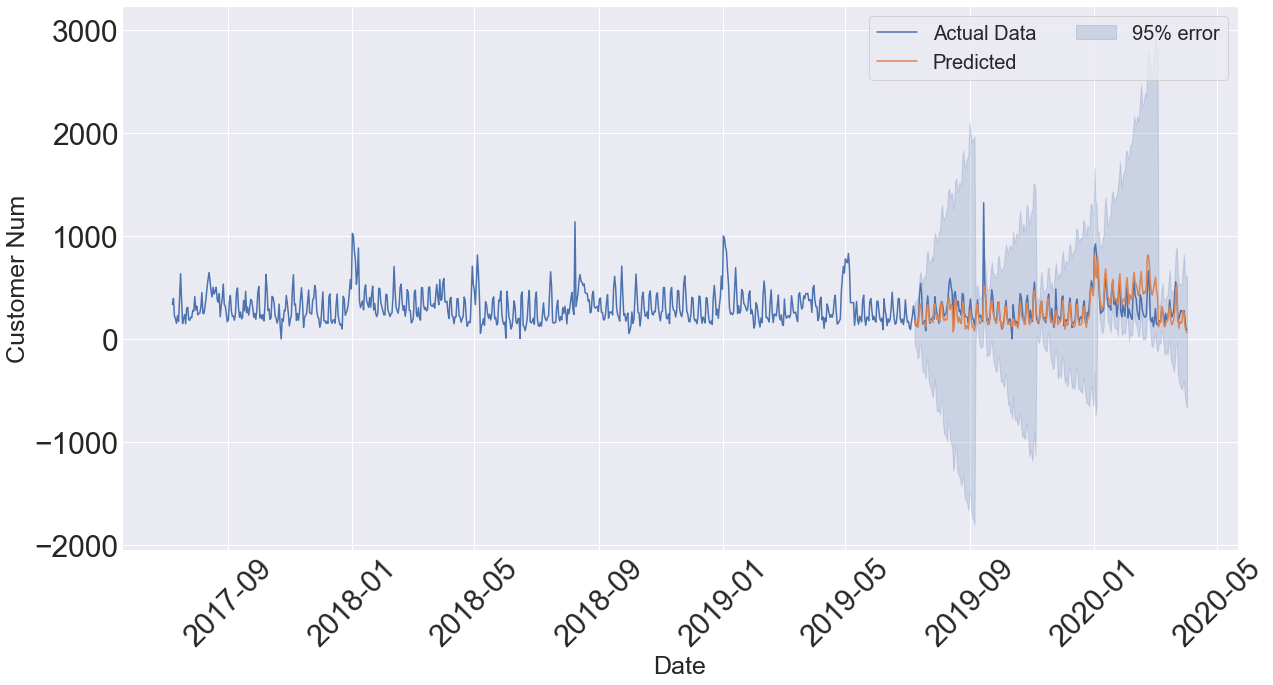

In [77]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(all_data, label='Actual Data')
plt.plot(test_result,label='Predicted')
plt.fill_between(test_index,Interval.iloc[:,0], Interval.iloc[:,1], color='b', alpha=0.2,label='95% error')

plt.xlabel("Date",fontsize=25)
plt.ylabel("Customer Num",fontsize=25)
plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

# plt.plot(Interval2.iloc[:,1], 'k:')
# plt.plot(Interval2.iloc[:,0], 'k:')


## training : 365days, test : 30days

In [12]:
for i in range(1,23):
    interval_pass2 = '../result/test' + str(i) + '/Interval.csv' 
    interval2 = pd.read_csv(interval_pass2)
    interval2 = interval2.T[1:]
    print(len(interval2))
    if i == 1:
        total_interval2 = interval2
    else:
        total_interval2 = pd.concat([total_interval2, interval2], axis=0)
Interval2 = total_interval2
        

30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
4


In [13]:
Interval2 = pd.DataFrame(list(zip(test_index2,Interval2.iloc[:,0],Interval2.iloc[:,1])), columns = ['date','low','high'])
Interval2 = Interval2.set_index('date')


(array([17410., 17532., 17652., 17775., 17897., 18017., 18140., 18262.,
        18383.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

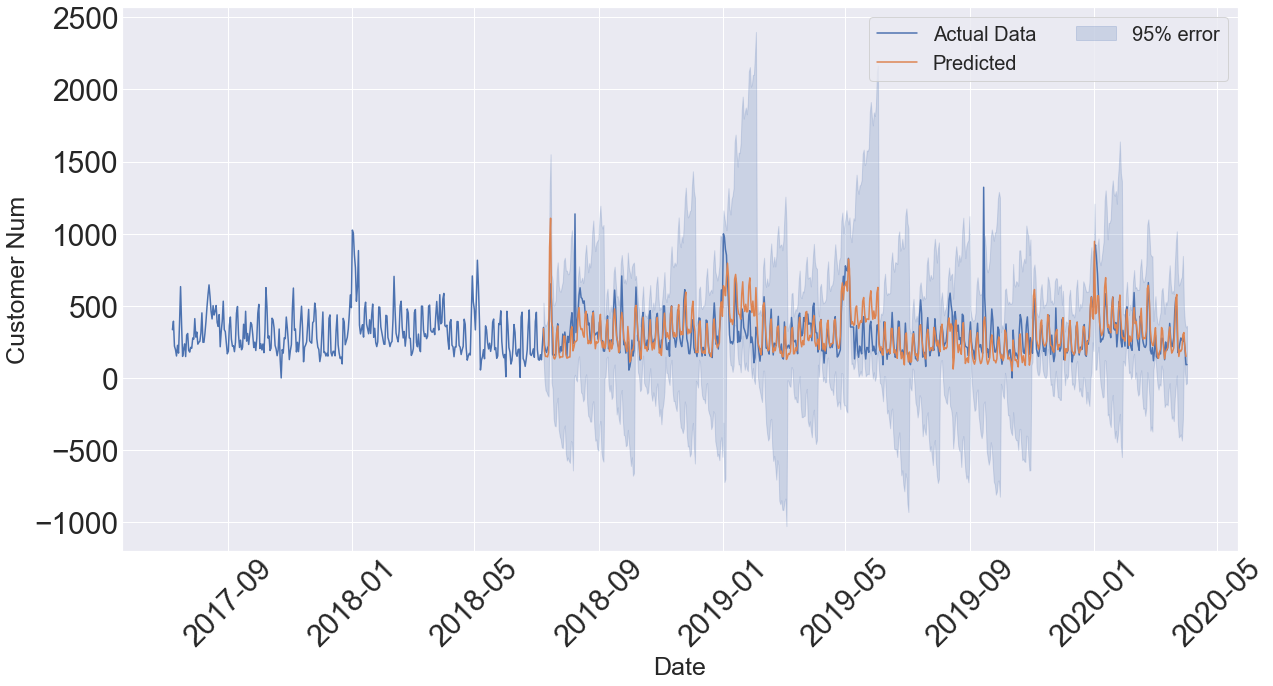

In [14]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(all_data, label='Actual Data')
plt.plot(test_result2,label='Predicted')
plt.fill_between(test_index2,Interval2.iloc[:,0], Interval2.iloc[:,1], color='b', alpha=0.2,label='95% error')

plt.xlabel("Date",fontsize=25)
plt.ylabel("Customer Num",fontsize=25)
plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

# plt.plot(Interval2.iloc[:,1], 'k:')
# plt.plot(Interval2.iloc[:,0], 'k:')
